In [1]:
import pandas as pd

# Supervised Learning
Let's train our first model!

Now, we will work with another library...

## Pandas
The pandas library focuses on data analysis and manipulation tasks.

## Classification
We are going to predict whether cars should be bought or not by assessing the deals.

Car Evaluation Database
Number of Instances: 1728
6 attributes, 4 classes

The classes are Acceptable, Very good, Good, and Unacceptable.

### Attributes

- cost of buying: very high, high, med, low
- cost of maintenance: very high, high, med, low
- number of doors: 2, 3, 4, 5+
- number of people: 2, 4, 5+
- luggage boot: small, medium, big
- safety level: low, medium, high

The first step is usually to clean and convert the data to a suitable format.

For this example, the CSV file already has the String values of the attributes and the classes ('very high', 'acceptable', etc.) translated as integer values.

In [2]:
df = pd.read_csv("car.csv", header=0)

In [3]:
# Preview of the first 5 columns
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,4,4,2,2,1,1,1
1,1,4,4,2,2,1,2,1
2,2,4,4,2,2,1,3,1
3,3,4,4,2,2,2,1,1
4,4,4,4,2,2,2,2,1


In [4]:
# Let's use all the cars with the columns going from 'buying' to 'safety' as attributes
X = df.values[:,1:7]

In [5]:
X.shape

(1728, 6)

In [6]:
X

array([[4, 4, 2, 2, 1, 1],
       [4, 4, 2, 2, 1, 2],
       [4, 4, 2, 2, 1, 3],
       ...,
       [1, 1, 6, 5, 3, 1],
       [1, 1, 6, 5, 3, 2],
       [1, 1, 6, 5, 3, 3]], dtype=int64)

In [7]:
# Let's safe the target = the assessment of each car
y = df.values[:,7]

In [9]:
df["class"]

0       1
1       1
2       1
3       1
4       1
       ..
1723    3
1724    4
1725    1
1726    3
1727    4
Name: class, Length: 1728, dtype: int64

In [8]:
y

array([1, 1, 1, ..., 1, 3, 4], dtype=int64)

### Use scikit-learn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# If you need information on what any function does, use the Help command
help (train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [12]:
# Give the attributes and targets as parameters to create the attributes and targets for training and testing

# Let's use 20% of our dataset as testing data and  80% as training data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [13]:
# Our training data
X_train.shape 

(1382, 6)

In [14]:
# Our testing data
X_test.shape

(346, 6)

In [15]:
# Training targets have the class for each of the cars
y_train.shape

(1382,)

### K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Let's instantiate the classifier
clf = KNeighborsClassifier( n_neighbors=3 ) 

In [18]:
# Train the Machine Learning model with the training data
clf.fit( X_train, y_train )

KNeighborsClassifier(n_neighbors=3)

In [19]:
X_test

array([[3, 3, 4, 2, 2, 3],
       [2, 1, 2, 4, 2, 2],
       [3, 3, 6, 2, 3, 2],
       ...,
       [2, 1, 2, 5, 1, 1],
       [4, 4, 6, 5, 1, 3],
       [2, 2, 2, 2, 2, 2]], dtype=int64)

In [20]:
# Now, let's make some predictions with our testing data that the model has not seen before
clf.predict( X_test )[:5]

array([1, 3, 1, 2, 1], dtype=int64)

In [22]:
# Then, let's compare what the model predicted with what the testing data actually had as target classes
y_test[:5]

array([1, 2, 1, 2, 1], dtype=int64)

Compare the outcome of the two cells above. 

If the numbers are the same, it means the model predicted the car deal **correctly**.

If the numbers are different, it means the model predicted the car deal **wrongly**.

### Evaluate the model accuracy

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
# Let's put all the predictions of our model in one variable
y_predict = clf.predict( X_test )

In [25]:
# Compare the classes of the testing data with the classes our model predicted
accuracy_score( y_test, y_predict )

0.8757225433526011

The model is correctly predicting the class in

In [26]:
perc_accuracy = accuracy_score( y_test, y_predict )

In [28]:
#round(, 4) * 100
format(perc_accuracy, ".0%")

'88%'

... of the cases. In the remaining percentage, the model makes a wrong prediction.

### Let's try a Neural Network for comparison
We will use a multi-layer Perceptron classifier that uses gradient descent.

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
clfnn = MLPClassifier(hidden_layer_sizes=(100,100,100))

In [31]:
# Train the model with the training data
clfnn.fit( X_train, y_train )

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [32]:
clfnn.predict( X_test )[:5]

array([1, 2, 1, 2, 1], dtype=int64)

In [33]:
y_test[:5]

array([1, 2, 1, 2, 1], dtype=int64)

In [34]:
y_predict_nn = clfnn.predict( X_test )

In [35]:
round( accuracy_score( y_test, y_predict_nn ), 4 )

0.9509

## More Classification Tasks

- Try training the model with a higher K of nearest neighbors.
- Have a look at the Titanic dataset in Kaggle for practicing classification on your own: https://www.kaggle.com/c/titanic
- You can also try the Breast Cancer dataset to predict a diagnosis (M = malignant, B = benign): https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# Regression

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Create a sample of 100 numbers that are evenly spaced
data_x = np.linspace(1, 10, 100)
print(data_x)

[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.45454545  8.545

In [39]:
rng = np.random.RandomState(42)

In [40]:
# Create another sample that would be the values we will try to predict
data_y = np.sin(data_x) + 0.1*np.power(data_x, 2) + rng.normal(size=len(data_x))

In [41]:
data_y

array([ 1.43818514,  0.86779095,  1.71265503,  2.64091867,  0.93041604,
        0.97068376,  2.8177347 ,  2.03305456,  0.81665525,  1.84269451,
        0.84436715,  0.84356767,  1.5469155 , -0.61818498, -0.44479209,
        0.69821521,  0.22390529,  1.52363213,  0.2710251 , -0.26593456,
        2.57766606,  0.85091736,  1.10864821, -0.41871442,  0.42779929,
        1.05123787, -0.23981224,  1.26121709,  0.26341364,  0.55579019,
        0.23478335,  2.68399223,  0.82026492, -0.21451342,  1.68308093,
       -0.33460169,  1.12958773, -0.9953376 , -0.31083065,  1.27687816,
        1.89094189,  1.40618979,  1.21143017,  1.12809719,  0.06255373,
        0.94267879,  1.33265855,  2.99021215,  2.42514951,  0.4751537 ,
        2.72668017,  2.18912409,  2.07552461,  3.54837434,  4.15730535,
        4.25186462,  2.67960617,  3.41108161,  4.25551633,  5.1054962 ,
        3.8574642 ,  4.3579114 ,  3.64367896,  3.75904721,  5.97112419,
        6.71562519,  5.48497648,  6.75434792,  6.30196362,  5.47

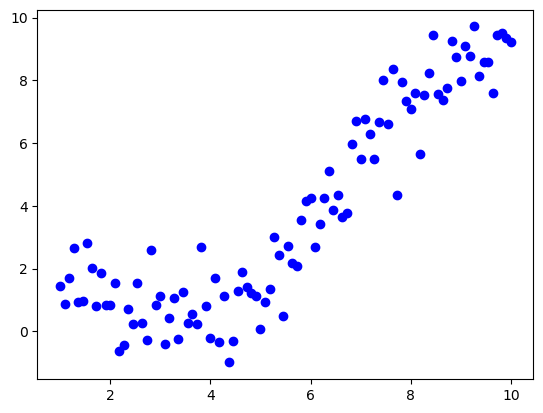

In [42]:
# Create a scatterplot with the data items as blue points 
plt.plot( data_x, data_y, 'bo' )

In [43]:
data_x.shape

(100,)

In [44]:
# Reshape the data because we need a matrix
data_x = data_x.reshape(-1,1)

In [45]:
data_x.shape

(100, 1)

### Always create first your training and testing data

In [47]:
X_train, X_test, y_train, y_test = train_test_split( data_x, data_y, test_size=0.25, random_state=123 )

In [48]:
X_train.shape

(75, 1)

## K-Nearest Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
kneighbor_regression = KNeighborsRegressor( n_neighbors = 3 )

In [53]:
# Let's train the model
kneighbor_regression.fit( X_train, y_train )

KNeighborsRegressor(n_neighbors=3)

In [55]:
# Now, let's make predictions
y_pred_test = kneighbor_regression.predict( X_test )

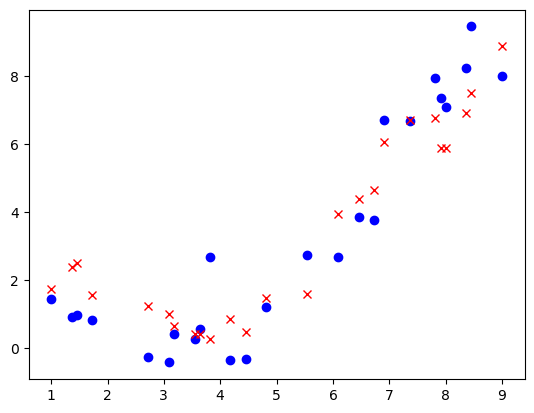

In [57]:
plt.plot( X_test, y_test, "bo", label="data" )
plt.plot( X_test, y_pred_test, "rx", label="prediction")

In [58]:
# Let's calculate the score
kneighbor_regression.score( X_test, y_test )

0.8742081392089907

The best possible score is 1.0, so you could try changing the K and see if the score improves.

## More Regression Tasks

- Try using Linear Regression with the same dataset using `from sklearn.linear_model import LinearRegression`
- Have a look at Diabetes dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

# References
- Pandas website: https://pandas.pydata.org/
- SciPy 2017 scikit-learn tutorial by Gramfort and Müller: https://github.com/amueller/scipy-2017-sklearn